# Project 1 : Sentiment prediction of Hotel Reviews (Test data) using collected customer sentiments data from different sources (Train data)


In [140]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [141]:
reviews=pd.read_csv("C:/Users/Arjun Rao/Desktop/DS/NLP/Project1/train.csv")
reviews.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


**Data Cleansing**

In [142]:
# Removing and renaming extra columns
reviews.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

reviews.rename(columns={'Description':'Review','Is_Response':'Response'},inplace=True)

In [143]:
reviews.head()

,Review,Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [144]:
reviews.Response.value_counts()

happy        26521
not happy    12411
Name: Response, dtype: int64

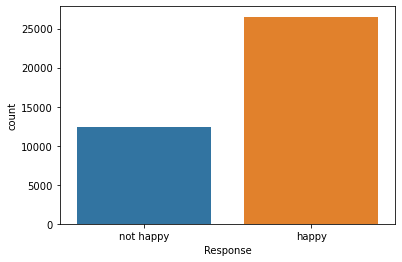

In [145]:
sns.countplot(x='Response',data=reviews)
plt.show()

In [146]:
reviews.Response.value_counts(normalize=True)*100

happy        68.12134
not happy    31.87866
Name: Response, dtype: float64

In [147]:
#Adding new column for Length of message
reviews['length'] = reviews.Review.str.len()
reviews.head(2)

,Review,Response,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077


In [148]:
#COnverting strings to lowercase
reviews['Review'] = reviews['Review'].str.lower()

# Remove punctuation
reviews['Review'] = reviews['Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
reviews['Review'] = reviews['Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
reviews['Review'] = reviews['Review'].str.replace(r'^\s+|\s+?$', '')

In [149]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
reviews['Review'] = reviews['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
reviews.head()

,Review,Response,length
0,"[the, room, was, kind, of, clean, but, had, a,...",not happy,248
1,"[i, stayed, at, the, crown, plaza, april, apri...",not happy,1077
2,"[i, booked, this, hotel, through, hotwire, at,...",not happy,1327
3,"[stayed, here, with, husband, and, sons, on, t...",happy,502
4,"[my, girlfriends, and, i, stayed, here, to, ce...",not happy,1613


In [150]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))
reviews['Review'] = reviews['Review'].apply(lambda x:[term for term in x if term not in stop_words])

In [151]:
#Stemming to get root words
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()
reviews['Review'] = reviews['Review'].apply(lambda x:' '.join(porter_stemmer.stem(y) for y in x))

In [152]:
reviews['clean_length'] = reviews.Review.str.len()
reviews.head()

,Review,Response,length,clean_length
0,room kind clean strong smell dog gener averag ...,not happy,248,126
1,stay crown plaza april april staff friendli at...,not happy,1077,569
2,book hotel hotwir lowest price could find got ...,not happy,1327,685
3,stay husband son way alaska cruis love hotel g...,happy,502,303
4,girlfriend stay celebr th birthday plan weeken...,not happy,1613,837


In [153]:
stop_words1 = set(stopwords.words('english')+ ['hotel', 'staff', 'room', 'stay', 'night', 'doin', 'use','front','desk','one','bathroom','us','alway','place','got','go','told','call','went','seem','close','check','book','even','nice'])
reviews['Review'] = reviews['Review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words1))

**Visualization charts**

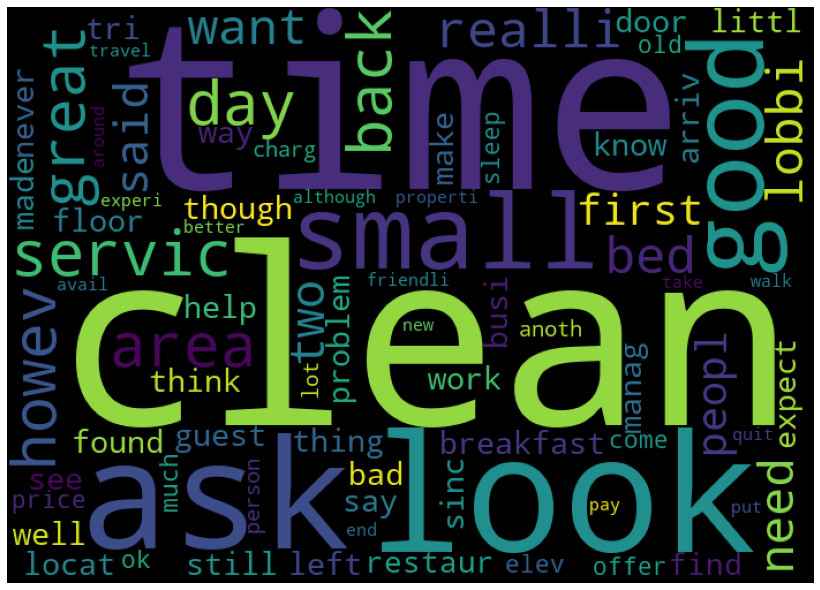

In [154]:
#Getting sense of loud words in reviews
from wordcloud import WordCloud


not_happy = reviews['Review'][reviews['Response']=='not happy']

not_happy_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(not_happy))

plt.figure(figsize=(12,8))
plt.imshow(not_happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

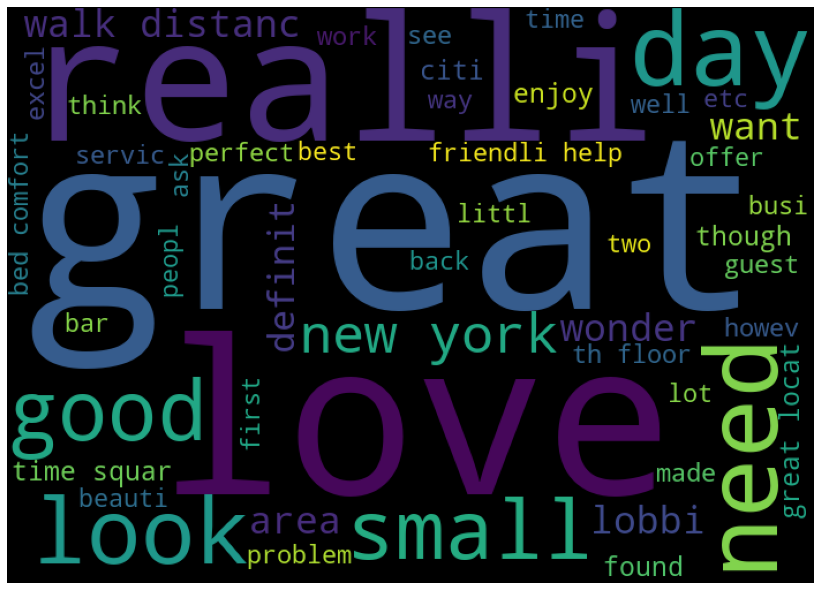

In [155]:
happy = reviews['Review'][reviews['Response']=='happy']

happy_cloud = WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(happy))

plt.figure(figsize=(12,8))
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [156]:
#Label coding 0 and 1
reviews['Response'].replace({'not happy':0,'happy':1},inplace=True)
reviews.head()

,Review,Response,length,clean_length
0,kind clean strong smell dog gener averag ok ov...,0,248,126
1,crown plaza april april friendli attent elev t...,0,1077,569
2,hotwir lowest price could find manag gave smok...,0,1327,685
3,husband son way alaska cruis love great experi...,1,502,303
4,girlfriend celebr th birthday plan weekend get...,0,1613,837


In [157]:
#Converting text into vectors using TF-IDF
#Spliting of features and labels
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(reviews['Review'])

X = features
y = reviews['Response']
X.shape

(38932, 31929)

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(reviews['Review'])
X_train_count.shape

(38932, 31929)

In [159]:
# Train and test splitting
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

**Using Multinomial Naive Bayes**

In [160]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)

print ('Accuracy = > ', accuracy_score(y_test,y_pred)*100)

Accuracy = >  81.59868488646872


In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61      3096
           1       0.79      0.99      0.88      6637

    accuracy                           0.82      9733
   macro avg       0.87      0.72      0.74      9733
weighted avg       0.84      0.82      0.79      9733



In [162]:
#confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1381, 1715],
       [  76, 6561]], dtype=int64)

**Using Support Vector Machines**

In [163]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
y_pred_sgd= sgd.predict(x_test)

print ('Accuracy = > ', accuracy_score(y_test,y_pred_sgd)*100)

Accuracy = >  88.11260659611631


In [164]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3096
           1       0.89      0.94      0.92      6637

    accuracy                           0.88      9733
   macro avg       0.87      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733



In [165]:
#confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_sgd)
conf_mat

array([[2337,  759],
       [ 398, 6239]], dtype=int64)

# Using Pipeline for CountVectorizer+TfidfTransformer

**Using Multinomial Naive Bayes**

In [166]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

text_clf_naive = Pipeline([('vect', CountVectorizer()),
                     ('tfidf',  TfidfTransformer()),
                     ('clf', MultinomialNB())])
text_clf = text_clf_naive.fit(reviews.Review, reviews.Response)
predicted_naive = text_clf.predict(reviews.Review)
print("Accuracy : ",accuracy_score(predicted_naive,reviews.Response)*100)

Accuracy :  84.31110654474469


In [167]:
conf_mat = confusion_matrix(predicted_naive,reviews.Response)
conf_mat

array([[ 6676,   373],
       [ 5735, 26148]], dtype=int64)

**---using grid search cv to improve the accuracy score---**

In [132]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2),(1,3)],
              'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3)}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(reviews.Review, reviews.Response)
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [133]:
gs_clf.best_score_

0.8672815788174162

**Using SGV(SVM+Logistic Regression)**

In [183]:
text_clf_sgd = Pipeline([('vect', CountVectorizer()),
                     ('tfidf',  TfidfTransformer()),
                     ('clf_sgd', SGDClassifier())])
text_clf_sg = text_clf_sgd.fit(reviews.Review, reviews.Response)
predicted_sgd = text_clf_sg.predict(reviews.Review)
print("Accuracy : ",accuracy_score(predicted_sgd,reviews.Response)*100)

Accuracy :  90.16747148874961


**---using grid search cv to improve the accuracy score---**

In [184]:
parameters_sg = {'vect__ngram_range': [(1, 1), (2, 2),(3,3)],
              'tfidf__use_idf': (True, False),
               'clf_sgd__alpha': (1e-2, 1e-3)}
gs_clf_sg = GridSearchCV(text_clf_sg, parameters_sg, n_jobs=-1)
gs_clf_sg = gs_clf_sg.fit(reviews.Review, reviews.Response)
gs_clf_sg.best_params_

{'clf_sgd__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}

In [186]:
gs_clf_sg.best_score_

0.8574951481605135

**The maximum accuracy we are getting is using SGDclassifier with CountVectorizer + TfidfTransformer**

# Generating test result using our final model SGDClassifier

In [187]:
#Generating test result using our final model SGDClassifier
test_rev=pd.read_csv("C:/Users/Arjun Rao/Desktop/DS/NLP/Project1/test.csv")
test_rev.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [188]:
predicted_sgd_test = text_clf_sg.predict(test_rev.Description)
test_rev['Response']=pd.DataFrame(predicted_sgd_test)
test_rev.head()

,User_ID,Description,Browser_Used,Device_Used,Response
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,0
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,1
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,1
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,0
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,1


In [190]:
#Replacing Labels 
test_rev['Response'].replace({0:'not happy',1:'happy'},inplace=True)
test_rev

,User_ID,Description,Browser_Used,Device_Used,Response
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,not happy
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop,happy
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,happy
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,not happy
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,happy
...,...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile,happy
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet,happy
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop,happy
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop,happy


In [192]:
test_rev['Response'].value_counts()

happy        21904
not happy     7500
Name: Response, dtype: int64

In [195]:
test_rev.to_excel('C:/Users/Arjun Rao/Desktop/DS/NLP/Project1/test.csv.xlsx',index=True)

**------ we have predicted the sentiments(happy or not happy) for our test data using best model------**